In [1]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from abc import ABC, abstractmethod

In [2]:
class Neuron:
    def __init__(self, weight, coord):
        self.weight_ = weight
        self.coord_ = coord

In [4]:
class Lattice(ABC):
    def __init__(self, size):
        self.size_ = size
        self.neurons_ = None
        self.neurons_nb_ = None

        self.generate()

    @abstractmethod
    def generate(self):
        pass

class RectangularLattice(Lattice):
    def generate(self):
        self.neurons_ = []
        self.neurons_nb_ = self.size_[0] * self.size_[1]

        for i in range(0, self.size_[0]):
            for j in range(0, self.size_[1]):
                self.neurons_.append(Neuron(None, np.array([i, j])))

In [197]:
class SOMM:
    def __init__(self, lattice:Lattice, learning_rate):
        self.learning_rate_ = learning_rate
        self.alpha_ = None
        self.lattice_ = lattice
              
    def fit(self, X:np.ndarray, epochs):
        neurons_nb = self.lattice_.neurons_nb_
        neurons = self.lattice_.neurons_

        indexes = np.random.choice(X.shape[0], neurons_nb, replace=False)

        for i in range(0, neurons_nb):
            neurons[i].weight_ = X[indexes[i]]

        for ep in range(epochs):
            self.alpha_ = np.sqrt(ep+1) * self.learning_rate_
            print("Epoch:", ep)
            print("1/2*sigma^2:", self.alpha_)
            print("Weights:")
            for neuron in self.lattice_.neurons_:
                print(neuron.weight_, end=' ')
            print()
            
            bmus_idx = []
            for x in X:
                # Find best matching unit for x_n
                winner_idx = self.find_bmu(x)
                bmus_idx.append(winner_idx)
                
            # Update nodes
            self.update_nodes(bmus_idx, X)
                

    def neighbourhood_func(self, r, s):
        # r - fixed neuron index
        # s - arbitrary neuron index

        numerator = np.exp(-self.alpha_ * self.distance(self.lattice_.neurons_[r].coord_, self.lattice_.neurons_[s].coord_))
        denominator = 0

        for neuron in self.lattice_.neurons_:
            denominator += np.exp(-self.alpha_ * self.distance(self.lattice_.neurons_[r].coord_, neuron.coord_))

        return numerator / denominator

    def find_bmu(self, x):
        # returns winner_idx
        min_d = np.inf
        winner_idx = None

        for i in range(self.lattice_.neurons_nb_):
            d = self.bmu_distance(x, i)
            if d < min_d:
                min_d = d
                winner_idx = i

        return winner_idx

    @staticmethod
    def distance(v1:np.ndarray, v2:np.ndarray):
        # Calculating euclidian distance
        return np.sqrt(np.sum((v1 - v2)**2))
    
    def bmu_distance(self, x, neuron_idx):
        distance = 0
        for i in range(self.lattice_.neurons_nb_):
            nb_val = self.neighbourhood_func(neuron_idx, i)

            distance += nb_val * (self.distance(x, self.lattice_.neurons_[i].weight_)/2 + np.log(nb_val)) 

        return distance

    def update_nodes(self, bmus_idx, X):
        # Updating all neuron based on batch mode
        
        for neuron_idx in range(self.lattice_.neurons_nb_):
            numerator = 0
            denominator = 0
            
            for i, x in enumerate(X):
                nb_val = self.neighbourhood_func(bmus_idx[i], neuron_idx)

                numerator += nb_val * x
                denominator += nb_val

            self.lattice_.neurons_[neuron_idx].weight_ = numerator / denominator
    

Text(0.5, 1.0, '1D Gaussian Mixture Dataset')

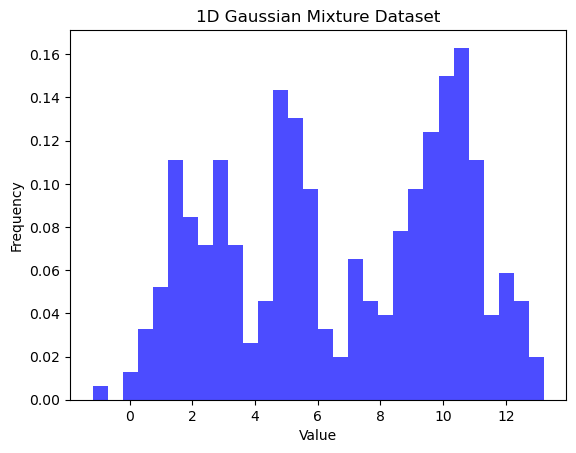

In [240]:
# Define the parameters for the Gaussian mixture
means = np.array([2, 5, 9, 11])
variance = 1.0  # Common variance for all components
n_samples = 80

# Generate data points from the Gaussian mixture
data = np.concatenate([np.random.normal(mean, variance, n_samples) for mean in means])

# Visualize the generated data
hist_data, bin_edges, _ = plt.hist(data, bins=30, density=True, alpha=0.7, color='b')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('1D Gaussian Mixture Dataset')

In [241]:
data

array([ 2.82554056,  0.98810947,  3.20543737,  1.66121189,  2.40619475,
        1.05198907,  2.37947786,  1.86430562,  2.76667878,  1.8435373 ,
        2.16808535,  1.8120759 ,  1.35373263,  1.61573909,  1.01638258,
        1.63100155,  0.53336979,  0.33617381,  2.78457618,  2.50101717,
        3.01472676,  1.85486697,  2.82652518,  2.94976372,  3.52515009,
        1.56428872,  2.56945007,  1.27839351,  2.58843663,  1.89355866,
        0.04246878,  1.93955391,  2.97135488,  3.07939579,  3.41497619,
        2.90580315,  0.7253777 ,  1.19747951,  1.26546879,  2.4529161 ,
        2.00956614,  1.63304057,  2.48730874,  1.22539181,  1.5417915 ,
        0.80030567,  3.1532241 ,  0.81652205,  3.58281953,  0.98766117,
        1.61569009,  2.79736942,  2.84588524,  2.84930413,  2.00227233,
        2.65670046,  2.9971242 ,  0.82765912,  2.92226298,  1.791549  ,
        2.65732225,  2.96382559,  3.23632934,  1.97103742,  3.91224337,
        1.86485173,  1.74320617,  1.69676139,  1.48019768,  1.45

In [242]:
X = data.reshape(-1, 1)
X

array([[ 2.82554056],
       [ 0.98810947],
       [ 3.20543737],
       [ 1.66121189],
       [ 2.40619475],
       [ 1.05198907],
       [ 2.37947786],
       [ 1.86430562],
       [ 2.76667878],
       [ 1.8435373 ],
       [ 2.16808535],
       [ 1.8120759 ],
       [ 1.35373263],
       [ 1.61573909],
       [ 1.01638258],
       [ 1.63100155],
       [ 0.53336979],
       [ 0.33617381],
       [ 2.78457618],
       [ 2.50101717],
       [ 3.01472676],
       [ 1.85486697],
       [ 2.82652518],
       [ 2.94976372],
       [ 3.52515009],
       [ 1.56428872],
       [ 2.56945007],
       [ 1.27839351],
       [ 2.58843663],
       [ 1.89355866],
       [ 0.04246878],
       [ 1.93955391],
       [ 2.97135488],
       [ 3.07939579],
       [ 3.41497619],
       [ 2.90580315],
       [ 0.7253777 ],
       [ 1.19747951],
       [ 1.26546879],
       [ 2.4529161 ],
       [ 2.00956614],
       [ 1.63304057],
       [ 2.48730874],
       [ 1.22539181],
       [ 1.5417915 ],
       [ 0

In [243]:
X.shape

(320, 1)

In [253]:
lattice = RectangularLattice((2, 2))
som = SOMM(lattice, 1.005)

In [254]:
som.fit(X, 100)

Epoch: 0
1/2*sigma^2: 1.005
Weights:
[9.57858422] [10.67737135] [11.77725868] [5.00343487] 
Epoch: 1
1/2*sigma^2: 1.4212846301849604
Weights:
[8.1156312] [7.19970312] [7.27916285] [5.03047688] 
Epoch: 2
1/2*sigma^2: 1.7407110616067214
Weights:
[9.27486921] [6.71738653] [6.76578253] [4.24014338] 
Epoch: 3
1/2*sigma^2: 2.01
Weights:
[9.58645994] [6.58281831] [6.87385811] [3.88668203] 
Epoch: 4
1/2*sigma^2: 2.2472483173872884
Weights:
[9.78590183] [6.38013211] [6.99737819] [3.58666793] 
Epoch: 5
1/2*sigma^2: 2.4617371914970936
Weights:
[9.91635068] [6.10840368] [7.13278431] [3.29161767] 
Epoch: 6
1/2*sigma^2: 2.6589800676199133
Weights:
[9.99410329] [5.84301963] [7.24524623] [2.97326251] 
Epoch: 7
1/2*sigma^2: 2.842569260369921
Weights:
[10.06272895] [5.65472256] [7.32522555] [2.73309002] 
Epoch: 8
1/2*sigma^2: 3.0149999999999997
Weights:
[10.14406296] [5.51728604] [7.43533656] [2.57060984] 
Epoch: 9
1/2*sigma^2: 3.178089048469221
Weights:
[10.21181925] [5.45642534] [7.52169303] [2.484725

In [255]:
for neuron in som.lattice_.neurons_:
    print(neuron.weight_)

[10.94810339]
[5.17547043]
[8.67733382]
[2.04579566]


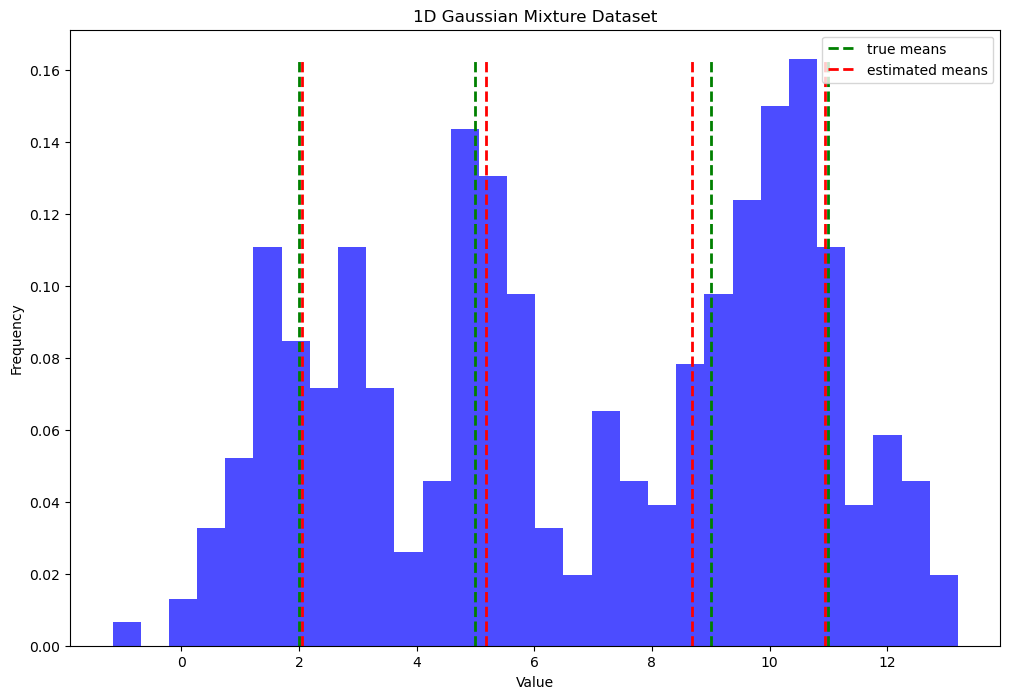

In [256]:
fig, ax = plt.subplots(figsize=(12, 8))

# Visualize the generated data
ax.hist(data, bins=30, density=True, alpha=0.7, color='b')
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_title('1D Gaussian Mixture Dataset')

neuron_weights = [neuron.weight_ for neuron in som.lattice_.neurons_]

# Plot vertical lines for real means:
ax.vlines(x=means, color='g', linestyle='--', linewidth=2, label='true means', ymin=0, ymax=max(hist_data))

# Plot vertical lines for neuron weights
ax.vlines(x=neuron_weights, color='r', linestyle='--', linewidth=2, label='estimated means', ymin=0, ymax=max(hist_data))

ax.legend(loc='upper right');